In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy import optimize
from scipy.linalg.matfuncs import norm
from functools import partial
import time

<ipython-input-1-66ed62b95423>:5: DeprecationWarning: Please use `norm` from the `scipy.linalg` namespace, the `scipy.linalg.matfuncs` namespace is deprecated.
  from scipy.linalg.matfuncs import norm


# Example 10.3

In [2]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
syms = Matrix([x1,x2,x3])

q = Matrix([[3 , 0 , 1],[0, 4 , 2],[1, 2, 3]])
x0 = Matrix([0, 0, 0])
f = (3/2)*x1**2+2*x2**2+(3/2)*x3**2+x1*x3+2*x2*x3-3*x1-x3
f1 = lambdify([x1,x2,x3] , f)
g = [diff(f,x1) , diff(f,x2) , diff(f,x3)]
g1 = lambdify([x1 , x2 , x3] , g)
g0 = Matrix(g1(x0[0], x0[1] , x0[2]))
i = 0
if g0 !=0 :
  d0 = -g0
  while (round(norm(g0,1),4)) != 0 :
    gd = g0.T*d0
    dqd = d0.T*q*d0
    alpha0 = -(gd[0])/(dqd[0])
    x1 = x0+alpha0*d0
    x0 = x1
    g0 = Matrix(g1(x0[0], x0[1] , x0[2]))
    gqd = g0.T*q*d0
    beta0 = gqd[0]/dqd[0]
    d1 = -g0 + beta0 * d0
    d0 = d1
    i+=1
else :
  print('optimal point :')
  print(x0)

print ('iteration :', i)
print ('optimal point :')
round3 = partial(round, ndigits=4)
x1.applyfunc(round3)

iteration : 3
optimal point :


Matrix([
[1.0],
[  0],
[  0]])

# Exercise 8.26

# Hestenes Stiefel formula 

In [3]:
x1 = Symbol('x1')
x2 = Symbol('x2')
alpha = Symbol('alpha')

x0 = Matrix([-2, 2])
f = 100*(x2-x1**2)**2+(1-x1)**2
f1 = lambdify([x1,x2] , f)
g = [diff(f,x1) , diff(f,x2) ]
g1 = lambdify([x1 , x2 ] , g)
g0 = Matrix(g1(x0[0], x0[1]))
d0 = -g0
a = Matrix(x0+alpha*d0)
f_alpha = f1(a[0], a[1])
f1_alpha = lambdify(alpha , f_alpha)
alpha0 = optimize.fmin(f1_alpha, 0,disp=False)
alpha0 = alpha0[0]
x1 = x0+alpha0*d0
g2 = Matrix(g1(x1[0], x1[1]))
i = 0
if g0 !=0 :
  d0 = -g0
  while (round(norm(g0,1),5)) != 0 :
    a = Matrix(x0+alpha*d0)
    f_alpha = f1(a[0], a[1])
    f1_alpha = lambdify(alpha , f_alpha)
    alpha0 = optimize.fmin(f1_alpha, 0,disp=False)
    alpha0 = alpha0[0]
    x1 = x0+alpha0*d0
    g2 = Matrix(g1(x1[0], x1[1]))
    x0 = x1
    g2g0 = g2.T*(g2-g0)
    d0g2 = d0.T*(g2-g0)
    beta0 = g2g0[0]/d0g2[0]
    g0 = Matrix(g1(x0[0], x0[1]))
    d1 = -g0 + beta0 * d0
    d0 = d1
    i+=1
else :
  print('optimal point :')
  print(x0)

print ('iteration :', i)
print ('optimal point :')
round3 = partial(round, ndigits=4)
x1.applyfunc(round3)

iteration : 25
optimal point :


Matrix([
[1.0],
[1.0]])

# Polak-Ribiere formula

In [4]:
x1 = Symbol('x1')
x2 = Symbol('x2')
alpha = Symbol('alpha')

x0 = Matrix([-2, 2])
f = 100*(x2-x1**2)**2+(1-x1)**2
f1 = lambdify([x1,x2] , f)
g = [diff(f,x1) , diff(f,x2) ]
g1 = lambdify([x1 , x2 ] , g)
g0 = Matrix(g1(x0[0], x0[1]))
d0 = -g0
a = Matrix(x0+alpha*d0)
f_alpha = f1(a[0], a[1])
f1_alpha = lambdify(alpha , f_alpha)
alpha0 = optimize.fmin(f1_alpha, 0,disp=False)
alpha0 = alpha0[0]
x1 = x0+alpha0*d0
g2 = Matrix(g1(x1[0], x1[1]))
i = 0
if g0 !=0 :
  d0 = -g0
  while (round(norm(g0,1),5)) != 0 :
    a = Matrix(x0+alpha*d0)
    f_alpha = f1(a[0], a[1])
    f1_alpha = lambdify(alpha , f_alpha)
    alpha0 = optimize.fmin(f1_alpha, 0,disp=False)
    alpha0 = alpha0[0]
    x1 = x0+alpha0*d0
    g2 = Matrix(g1(x1[0], x1[1]))
    x0 = x1
    g2g0 = g2.T*(g2-g0)
    g0tg0 = g0.T*g0
    beta0 = g2g0[0]/g0tg0[0]
    g0 = Matrix(g1(x0[0], x0[1]))
    d1 = -g0 + beta0 * d0
    d0 = d1
    i+=1
else :
  print('optimal point :')
  print(x0)

print ('iteration :', i)
print ('optimal point :')
round3 = partial(round, ndigits=4)
x1.applyfunc(round3)

iteration : 30
optimal point :


Matrix([
[1.0],
[1.0]])

# Fletcher-Reeves formula

In [5]:
x1 = Symbol('x1')
x2 = Symbol('x2')
alpha = Symbol('alpha')

x0 = Matrix([-2, 2])
f = 100*(x2-x1**2)**2+(1-x1)**2
f1 = lambdify([x1,x2] , f)
g = [diff(f,x1) , diff(f,x2) ]
g1 = lambdify([x1 , x2 ] , g)
g0 = Matrix(g1(x0[0], x0[1]))
d0 = -g0
a = Matrix(x0+alpha*d0)
f_alpha = f1(a[0], a[1])
f1_alpha = lambdify(alpha , f_alpha)
alpha0 = optimize.fmin(f1_alpha, 0,disp=False)
alpha0 = alpha0[0]
x1 = x0+alpha0*d0
g2 = Matrix(g1(x1[0], x1[1]))
i = 0
if g0 !=0 :
  d0 = -g0
  while (round(norm(g0,1),5)) != 0 :
    a = Matrix(x0+alpha*d0)
    f_alpha = f1(a[0], a[1])
    f1_alpha = lambdify(alpha , f_alpha)
    alpha0 = optimize.fmin(f1_alpha, 0,disp=False)
    alpha0 = alpha0[0]
    x1 = x0+alpha0*d0
    g2 = Matrix(g1(x1[0], x1[1]))
    x0 = x1
    g2tg2 = g2.T*g2
    g0tg0 = g0.T*g0
    beta0 = g2tg2[0]/g0tg0[0]
    g0 = Matrix(g1(x0[0], x0[1]))
    d1 = -g0 + beta0 * d0
    d0 = d1
    i+=1
else :
  print('optimal point :')
  print(x0)

print ('iteration :', i)
print ('optimal point :')
round3 = partial(round, ndigits=4)
x1.applyfunc(round3)

iteration : 135
optimal point :


Matrix([
[1.0],
[1.0]])

# Newton's method

In [6]:
x1 = Symbol('x1')
x2 = Symbol('x2')
alpha = Symbol('alpha')
x0 = Matrix([-2,2])
eps = 10**(-4)
syms = Matrix([x1,x2])
f = 100*(x2-x1**2)**2+(1-x1)**2
f1 = lambdify(syms , f)
Matrix_f = Matrix([f])
grad_f = Matrix_f.jacobian(syms).T
grad_f1=lambdify([x1 , x2] , grad_f)
grad_fx0 = Matrix(grad_f1(x0[0], x0[1]))
jacobi_f = Matrix([grad_f.jacobian(syms)])
jacobi_f1 = lambdify([x1 , x2] , jacobi_f)
jac_f_x0 = Matrix(jacobi_f1(x0[0], x0[1]))
i = 0
if jac_f_x0.is_positive_definite :
  while norm(grad_fx0,np.inf)>=eps :
    grad_f_x0 = Matrix(grad_f1(x0[0], x0[1]))
    jac_f_x0 = Matrix(jacobi_f1(x0[0], x0[1]))
    x1 = x0 - (jac_f_x0.inv())*grad_f_x0
    grad_fx0 = Matrix(grad_f1(x0[0], x0[1]))
    x0 = x1
    i+=1

else :
  for i in range(3):
    a = Matrix(x0 - alpha*(jac_f_x0.inv())*grad_fx0)
    f_alpha = f1(a[0], a[1])
    f1_alpha = lambdify(alpha , f_alpha)
    alpha0 = optimize.fmin(f1_alpha, 0.3,disp=False)
    alpha0 = alpha0[0]
    x1 = x0 - alpha*(jac_f_x0.inv())*grad_fx0
    x0=x1


print ('iteration :', i)
print ('optimal point :')
round3 = partial(round, ndigits=4)
x0.applyfunc(round3)

iteration : 6
optimal point :


Matrix([
[1.0],
[1.0]])

# Example 9.3

In [11]:
t=[ 0, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000, 5.5000, 6.0000, 
   6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000, 10.0000]

y=[1.4147, 1.9198, 1.9548, 1.5112, 0.6977, -0.2867, -1.2009, -1.8211, -1.9954, -1.6811, -0.9553, 0.0044,
    0.9631, 1.6859, 1.9960, 1.8174, 1.1938, 0.2780, -0.7060, -1.5170, -1.9567]

In [12]:
x1 = Symbol('x1')
x2 = Symbol('x2')
x3 = Symbol('x3')
y1 = np.zeros(len(y))
r = np.ones(len(y))
x0 = Matrix([2.5,1,1])
j = np.zeros([21,3])
for k in range(30):
  for i in range(len(t)):
    y1[i] = x0[0] * sin(x0[1]*t[i]+x0[2])
    j[i][0] = -sin(t[i]*x0[1] + x0[2])
    j[i][1] = -t[i]* x0[0] * cos(t[i]*x0[1]+x0[2])
    j[i][2] = -x0[0] * cos(t[i]*x0[1]+x0[2])
    r[i] = y[i] - y1[i]
  jt = j.T
  inv_j_jt = np.linalg.inv(np.dot(jt, j))
  jj = np.dot(inv_j_jt,jt)
  r1 = (Matrix([r]).T)
  x1 = x0 - np.dot(jj , r1)
  x0 = x1


In [13]:
x0

Matrix([
[ 2.00070552699679],
[ 1.00000010159583],
[0.785396233418194]])

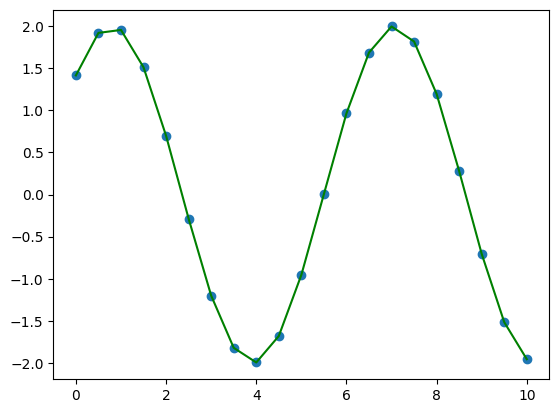

In [14]:
plt.scatter(t,y)
plt.plot(t,y1,'g')